##  Задание nVIDIA

Дано:
- 10 серверов-приемников, где на каждом одинаковое количество вычислительных мощностей и диск неограниченного размера
- 10000 серверов источников файлов логов разных размеров
- файлы неделимы (это gz архивы). Можеть быть, что: один файл имеет размер 1 тэрабайт и 1000 файлов - по 500 килобайт

Найти:
- алгоритм, который распределит файлы по 10 серверам так, что бы запущенная на всех одновременно обработка данных, по возможности одновременно и закончилась.

In [1]:
%pylab inline
import os
import seaborn

Populating the interactive namespace from numpy and matplotlib


C:\Application\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import numpy as np
from scipy.stats import multivariate_normal
import scipy.stats
import random as rd
import itertools

In [3]:
def destination_len(dest):
    return [sum(i) for i in dest]

In [4]:
# вариант 1 генераци случайных чисел 
v=0

In [5]:
if v==0:
    distribution = scipy.stats.norm(loc=1000,scale=50)
    sample = distribution.rvs(size=10000)
    sample_list=sample.tolist()
    sources=map(int,sample_list)
else:
    # вариант 2 генераци случайных чисел 
    # создадим тестовый массив входных данных с необходимым распределением
    sources=[]
    source1=[rd.randint(10000,10100) for i in range(100) ]
    source2=[rd.randint(1,100) for i in range(100)]
    source3=[rd.randint(100,300) for i in range(100)]
    source4=[rd.randint(300,500) for i in range(100)]
    source5=[rd.randint(500,700) for i in range(300)]
    source6=[rd.randint(700,1000) for i in range(200)]
    source7=[rd.randint(1000,5000) for i in range(100)]
    sources=source1+source2+source3+source4+source5+source6+source7

In [6]:
if v==0:
    sources.sort()
    
else:
    rd.shuffle(sources)

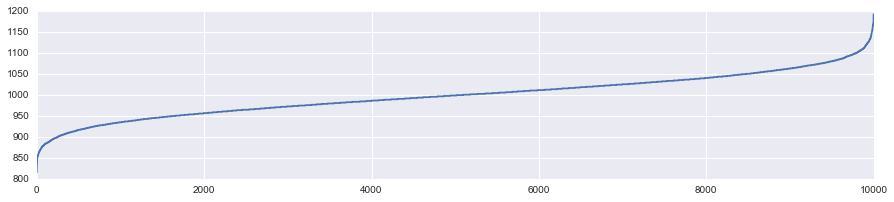

In [7]:
plt.figure(figsize=(15,3))
plt.plot(sources)
plt.show()

(array([   10.,   152.,   630.,  1812.,  2754.,  2676.,  1432.,   435.,
           82.,    17.]),
 array([  815. ,   852.8,   890.6,   928.4,   966.2,  1004. ,  1041.8,
         1079.6,  1117.4,  1155.2,  1193. ]),
 <a list of 10 Patch objects>)

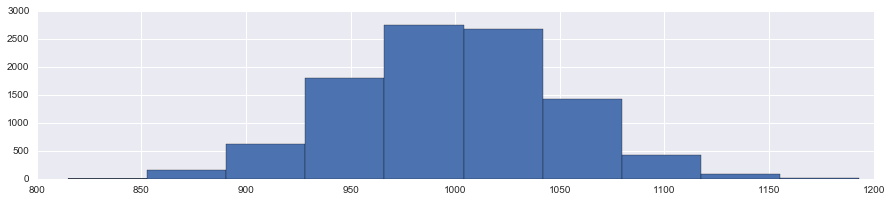

In [8]:
plt.figure(figsize=(15,3))
plt.hist(sources)

In [9]:
len(sources)

10000

In [10]:
# представим серверы-приемники в виде массива
destination=[[0] for x in range(10)] 


In [11]:
def method1():
    treshold = 10000
    for i in range(100):
        a = 0
        while a < 10:
            current_in = sources.pop()
        #   размещаем файл на одном из серверов
            total_l = sum(destination[a]) 
            difference = treshold - (current_in + total_l)
            if difference > 0:
                destination[a].append(current_in)
            a = a + 1

In [12]:
def method2():
    for i in range(1000):
        a = 0
        while a < 10:
            current_in = sources.pop()
            k=randint(10)
            destination[k].append(current_in)
            a = a + 1


In [13]:
# распределить (to redistribute)
method2()

In [14]:
print [randint(10) for i in range(100)]

[3, 3, 5, 5, 8, 7, 7, 8, 0, 6, 3, 1, 4, 4, 0, 8, 7, 8, 6, 9, 9, 2, 9, 8, 3, 8, 8, 5, 7, 4, 9, 0, 7, 6, 8, 5, 3, 3, 8, 4, 3, 0, 0, 1, 9, 5, 0, 3, 5, 8, 5, 5, 0, 5, 5, 5, 4, 8, 8, 4, 1, 0, 2, 0, 9, 9, 7, 6, 7, 3, 9, 1, 6, 1, 6, 5, 2, 7, 0, 5, 8, 6, 2, 1, 4, 2, 1, 2, 6, 6, 7, 2, 4, 8, 0, 5, 4, 2, 2, 7]


In [ ]:
for i in destination:
    print i,sum(i)
    print("----------------------")

In [16]:
# for i in destination:print i

In [17]:
dist_len=destination_len(destination)

In [18]:
print dist_len

[1013628, 1013840, 964413, 999531, 988101, 1010490, 978085, 1021575, 1018487, 983079]


In [19]:
len(sources)

0

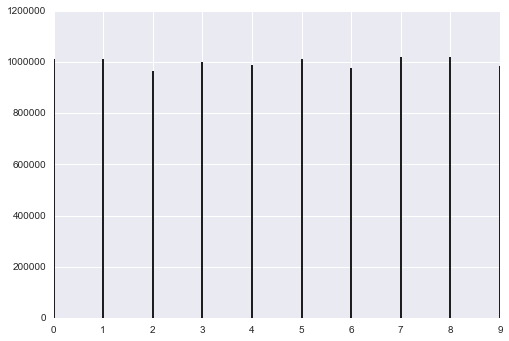

In [20]:
plt.vlines(range(10),[0],dist_len)